EDA FOR MOBILE_PAYMENTS_Fraud_detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Safer relative path using forward slash
df = pd.read_csv("../data/raw/Mobile_payments_data.csv")
print("shape",df.shape)
print("Columns",df.columns.tolist())
df.head()

shape (10000, 9)
Columns ['transaction_id', 'timestamp', 'user_id', 'amount', 'merchant_id', 'location', 'device_type', 'transaction_type', 'is_fraud']


,transaction_id,timestamp,user_id,amount,merchant_id,location,device_type,transaction_type,is_fraud
0,TXN000000,17-05-2025 00:16,1035,259.86,2015,Mumbai,Android,transfer,0
1,TXN000001,06-05-2025 13:48,1011,8922.87,2037,Kolkata,Android,transfer,0
2,TXN000002,13-05-2025 03:55,1077,2334.28,2001,Chennai,Android,purchase,0
3,TXN000003,02-06-2025 19:48,1000,5896.76,2048,Mumbai,Web,purchase,0
4,TXN000004,13-05-2025 21:31,1097,1563.24,2021,Delhi,Android,purchase,0


In [2]:
print(df.isnull().sum())
dup_count=df.duplicated(subset='transaction_id').sum()
print("Duplicate transactions",dup_count)
abnormal=df[df['amount']<=0]
print("Negative or abnormal amounts",len(abnormal))
df['timestamp']=pd.to_datetime(df['timestamp'],errors='coerce',dayfirst=True)
future_txns=df[df['timestamp']>pd.Timestamp.now()]
print('Future timestamps:',len(future_txns))

transaction_id      0
timestamp           0
user_id             0
amount              0
merchant_id         0
location            0
device_type         0
transaction_type    0
is_fraud            0
dtype: int64
Duplicate transactions 0
Negative or abnormal amounts 0
Future timestamps: 0


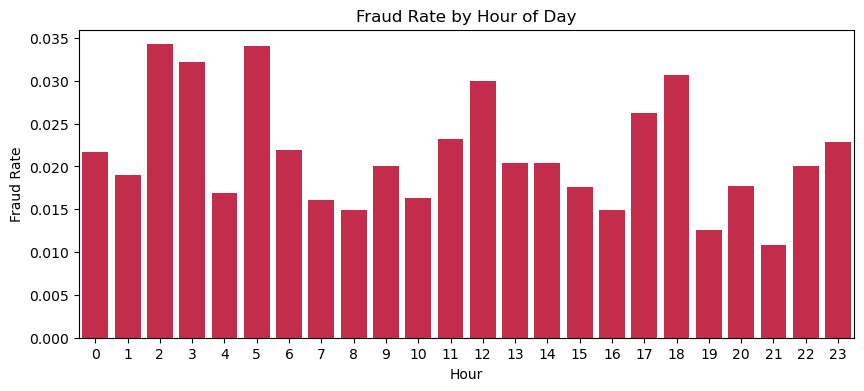

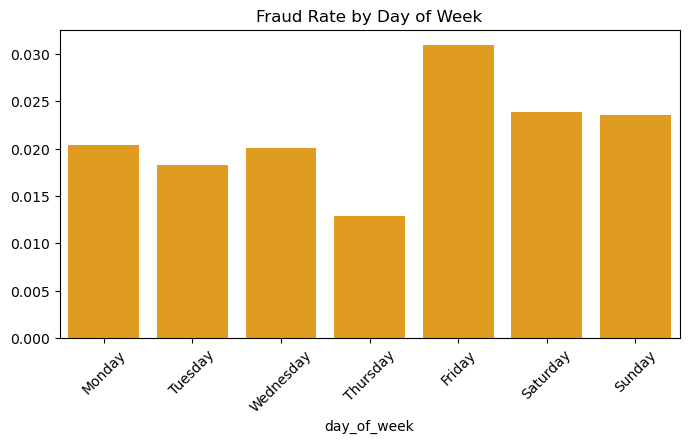

In [3]:
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday','Sunday']).astype(int)


fraud_by_hour = df.groupby('hour')['is_fraud'].mean()

plt.figure(figsize=(10,4))
sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values, color='crimson')
plt.title("Fraud Rate by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Fraud Rate")
plt.show()


fraud_by_day = df.groupby('day_of_week')['is_fraud'].mean().reindex( ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(8,4))
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values, color='orange')
plt.title("Fraud Rate by Day of Week")
plt.xticks(rotation=45)
plt.show()


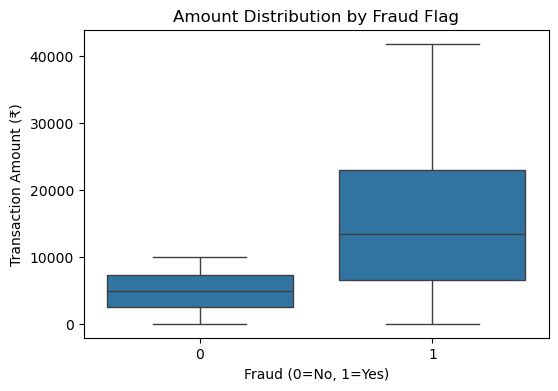

           count          mean           std    min        25%       50%  \
is_fraud                                                                   
0         9786.0   4960.719917   2864.607996  10.70  2494.6350   4954.76   
1          214.0  15220.384252  10376.630329  18.81  6572.6725  13334.38   

                 75%       max  
is_fraud                        
0          7352.7100   9999.77  
1         22931.3975  41781.93  


In [4]:
plt.figure(figsize=(6,4))
sns.boxplot(x='is_fraud', y='amount', data=df)
plt.title("Amount Distribution by Fraud Flag")
plt.xlabel("Fraud (0=No, 1=Yes)")
plt.ylabel("Transaction Amount (₹)")
plt.show()

print(df.groupby('is_fraud')['amount'].describe())


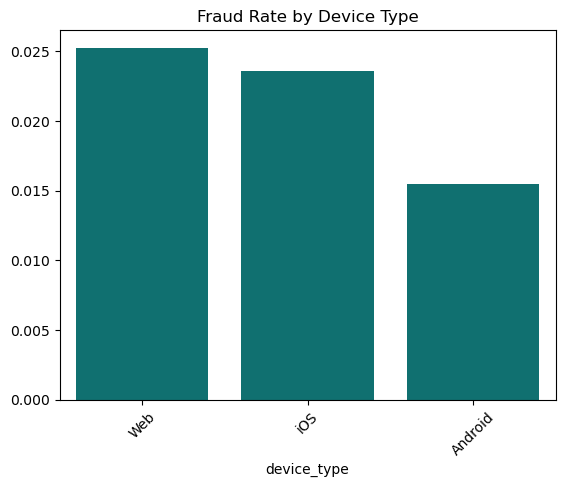

In [5]:
fraud_by_device = df.groupby('device_type')['is_fraud'].mean().sort_values(ascending=False)
sns.barplot(x=fraud_by_device.index, y=fraud_by_device.values, color='teal')
plt.title("Fraud Rate by Device Type")
plt.xticks(rotation=45)
plt.show()


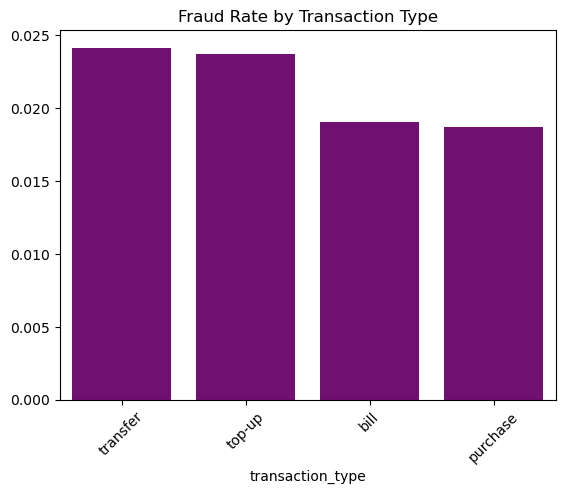

In [6]:
fraud_by_txn = df.groupby('transaction_type')['is_fraud'].mean().sort_values(ascending=False)
sns.barplot(x=fraud_by_txn.index, y=fraud_by_txn.values, color='purple')
plt.title("Fraud Rate by Transaction Type")
plt.xticks(rotation=45)
plt.show()


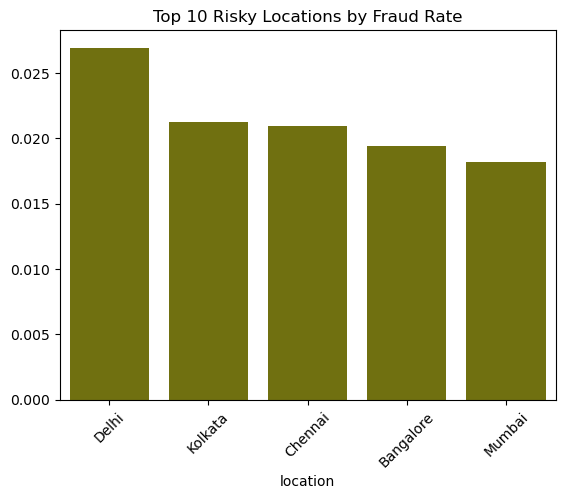

In [7]:
top_loc = df.groupby('location')['is_fraud'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_loc.index, y=top_loc.values, color='olive')
plt.title("Top 10 Risky Locations by Fraud Rate")
plt.xticks(rotation=45)
plt.show()


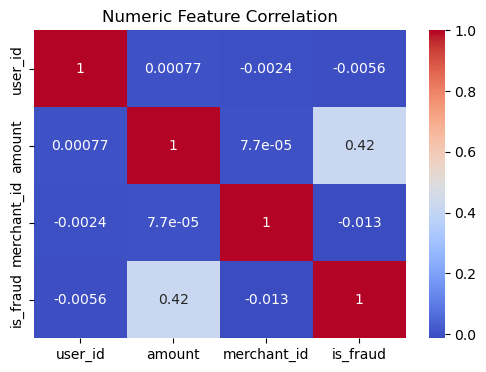

In [8]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
corr = df[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Numeric Feature Correlation")
plt.show()


In [9]:
df_clean = df.drop_duplicates(subset='transaction_id')
df_clean = df_clean[df_clean['amount'] > 0]
df_clean.to_csv("transactions_clean.csv", index=False)
print("cleaned dataset save successfully")


cleaned dataset save successfully
